In [130]:
import numpy as np 
import pandas as pd 
import pickle

In [131]:
data = pd.read_csv('spam.csv',encoding='ISO-8859-1')
data.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [132]:
# Data cleaning 
# EDA
# Text preprocessing 
# Evaluation 
# improvement
# website 
# Deployment


In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [134]:
# in last 3 column most of the columns are empty so drop these columns
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)


In [135]:
data.sample(5)

,v1,v2
3395,spam,URGENT! Your Mobile number has been awarded wi...
4328,ham,1Apple/Day=No Doctor. 1Tulsi Leaf/Day=No Cance...
4707,ham,"Did you say bold, then torch later. Or one tor..."
499,ham,Dear i have reache room
13,ham,I've been searching for the right words to tha...


In [136]:
data.rename(columns={'v1':'target','v2':'text'},inplace=True)
data

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [137]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [138]:
data['target'] = le.fit_transform(data['target'])

In [139]:
data

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [140]:
data.isnull().sum()
# No misssing value

target    0
text      0
dtype: int64

In [141]:
data.duplicated().sum()

data = data.drop_duplicates(keep='first')
data

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [142]:
data.duplicated().sum()
data.shape

(5169, 2)

In [143]:
# EDA 
data['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

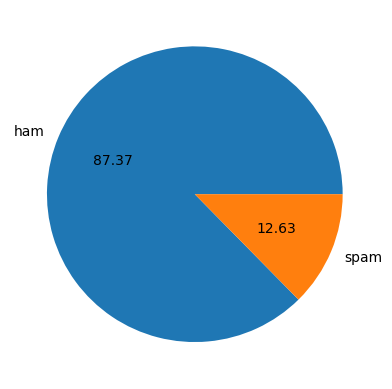

In [144]:
import matplotlib.pyplot as plt
plt.pie(data['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()
# Data is imbalanced 

In [145]:
data['num_characters'] = data['text'].apply(len)


C:\Users\ayush gupta\AppData\Local\Temp\ipykernel_15144\1525169327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_characters'] = data['text'].apply(len)


In [146]:
import nltk
data['num_words']  = data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\ayush gupta\AppData\Local\Temp\ipykernel_15144\4180807995.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_words']  = data['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [147]:
import nltk
data['num_sent']  = data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\ayush gupta\AppData\Local\Temp\ipykernel_15144\4084112883.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_sent']  = data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [148]:
data.head()

,target,text,num_characters,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [149]:
# Ham 
data[data['target'] == 0][['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [150]:
# Spam 
data[data['target'] == 1][['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [151]:
import seaborn as sns


<Axes: xlabel='num_characters', ylabel='Count'>

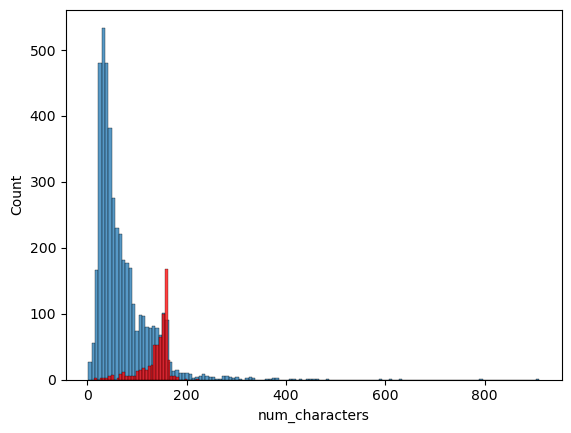

In [152]:
sns.histplot(data[data['target'] == 0]['num_characters'])  # Not Spam
sns.histplot(data[data['target'] == 1]['num_characters'],color='red') # Spam

<Axes: xlabel='num_words', ylabel='Count'>

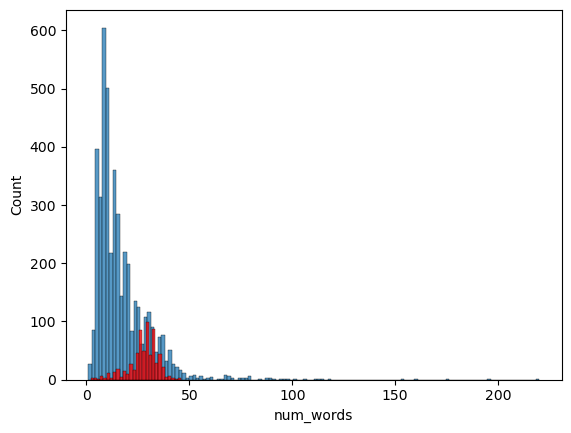

In [153]:
sns.histplot(data[data['target'] == 0]['num_words'])  # Not Spam
sns.histplot(data[data['target'] == 1]['num_words'],color='red') # Spam

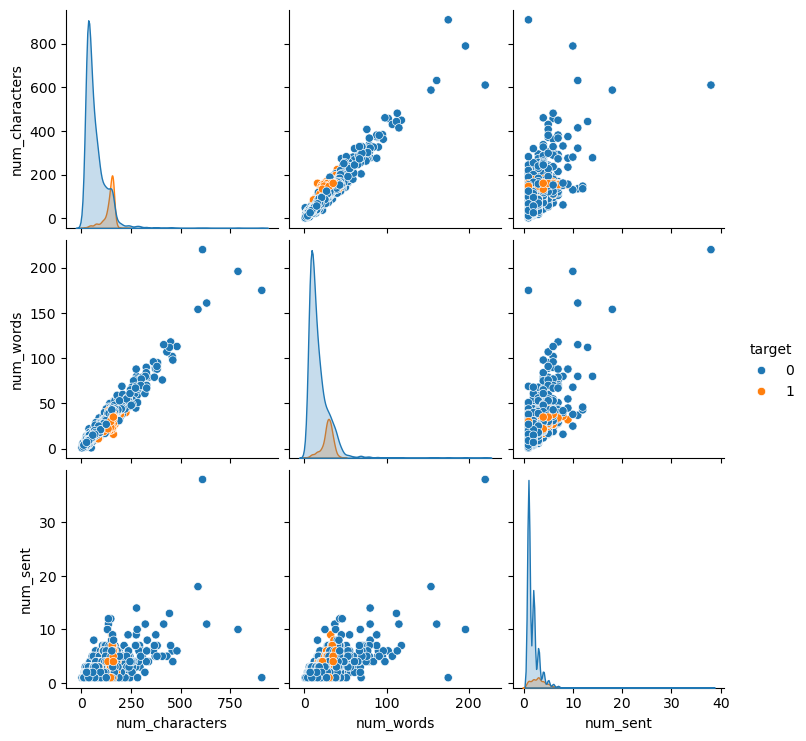

In [154]:
sns.pairplot(data,hue='target')

<Axes: >

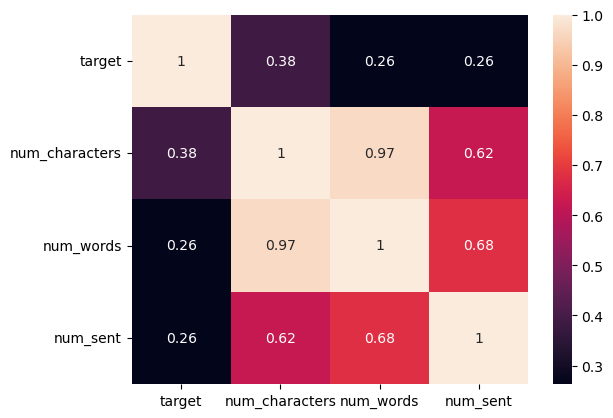

In [155]:
num_data = data.select_dtypes(include='number')
sns.heatmap(num_data.corr(),annot=True)

In [156]:
# Data Preprocessing 
# 1. Lower case
# 2. Tokenization 
# 3. Removeing special characters
# 4. Removing Stop words and Punctuation 
# 5. Stemming 

In [157]:
from nltk.corpus import stopwords 
import string

In [158]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return  " ".join(y)     

In [159]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [160]:
data['transform_text'] = data['text'].apply(transform_text)
data.head()

C:\Users\ayush gupta\AppData\Local\Temp\ipykernel_15144\3137001873.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['transform_text'] = data['text'].apply(transform_text)


,target,text,num_characters,num_words,num_sent,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [161]:
import sys
print(sys.executable)


c:\Users\ayush gupta\anaconda3\python.exe


In [162]:
from wordcloud import WordCloud

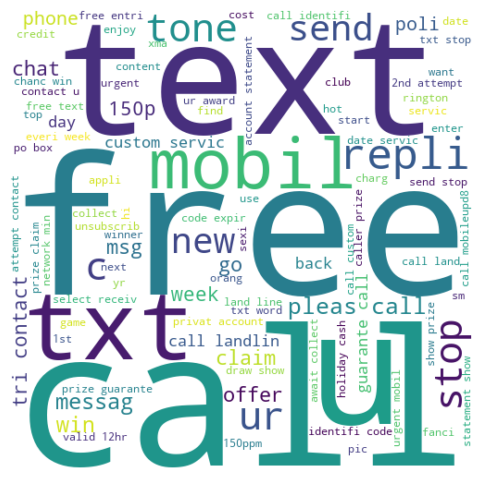

In [163]:
wc = WordCloud(width = 500,height = 500,min_font_size = 10,background_color = 'white')
spam_wc = wc.generate(data[data['target'] == 1]['transform_text'].str.cat(sep=" "))
plt.figure(figsize=(12, 6))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

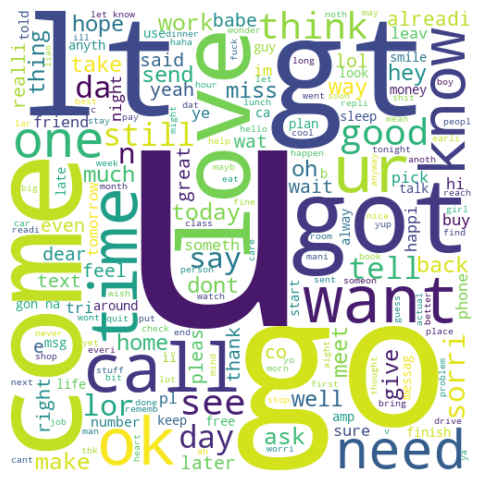

In [164]:
ham_wc = wc.generate(data[data['target'] == 0]['transform_text'].str.cat(sep=" "))
plt.figure(figsize=(12, 6))
plt.imshow(ham_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [165]:
# Most comman word used in spam SMS 
spam_corpus = []
for msg in data[data['target'] == 1]['transform_text'].to_list():
    for word in msg.split():
        spam_corpus.append(word)

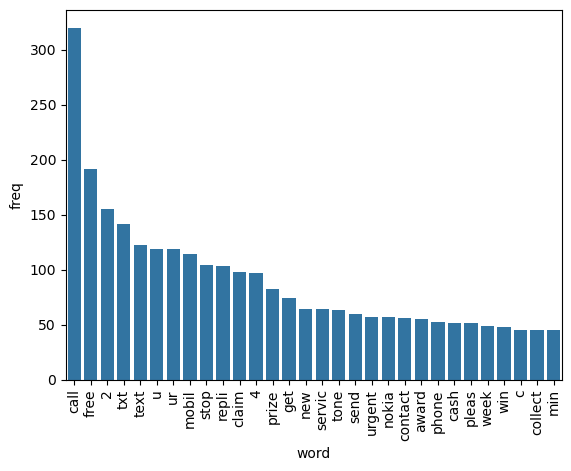

In [166]:
from collections import Counter
most_common_words = pd.DataFrame(Counter(spam_corpus).most_common(30),columns=['word','freq'])
sns.barplot(x='word', y='freq', data=most_common_words)
plt.xticks(rotation='vertical')
plt.show()


In [167]:
# Most comman word used in Ham SMS 
ham_corpus = []
for msg in data[data['target'] == 0]['transform_text'].to_list():
    for word in msg.split():
        ham_corpus.append(word)

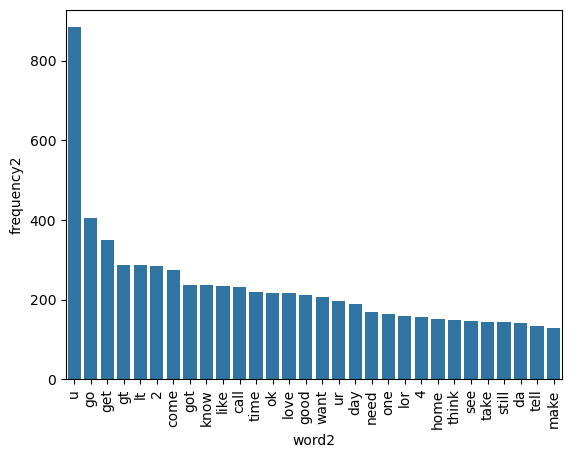

In [168]:
most_common_words = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word2', 'frequency2'])

# Create barplot
sns.barplot(x='word2', y='frequency2', data=most_common_words)
plt.xticks(rotation='vertical')
plt.show()

In [197]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [198]:
X = tfidf.fit_transform(data['transform_text']).toarray()

In [171]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [199]:
y = data['target'].values

In [200]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score


In [201]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [202]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [176]:
# gnb.fit(X_train,y_train)
# y_pred1 = gnb.predict(X_test)
# print(accuracy_score(y_test,y_pred1))
# print(confusion_matrix(y_test,y_pred1))
# print(precision_score(y_test,y_pred1))

In [203]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9729206963249516
[[888   1]
 [ 27 118]]
0.9915966386554622


In [178]:
# bnb.fit(X_train,y_train)
# y_pred3 = bnb.predict(X_test)
# print(accuracy_score(y_test,y_pred3))
# print(confusion_matrix(y_test,y_pred3))
# print(precision_score(y_test,y_pred3))

In [ ]:
#Abb tak subse accha preformance tfidf --> mnb de raha hai 
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC 
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier 
# from sklearn.ensemble  import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier,BaggingClassifier
# from xgboost import XGBClassifier


In [ ]:
# svc = SVC(kernel='sigmoid', gamma=1.0)
# knc = KNeighborsClassifier()
mnb = MultinomialNB()
# dtc = DecisionTreeClassifier(max_depth=5)
# lrc = LogisticRegression(solver='liblinear', penalty='l1')
# rfc = RandomForestClassifier(n_estimators=50, random_state=2)
# abc = AdaBoostClassifier(n_estimators=50, random_state=2)
# bc = BaggingClassifier(n_estimators=50, random_state=2)
# etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
# gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
# xgb = XGBClassifier(n_estimators=50, random_state=2)

In [ ]:
clfs = {
#     'SVC': svc,
#     # 'KN': knc,
    'NB': mnb,
#     # 'DT': dtc,
#     # 'LR': lrc,
#     # 'RF': rfc,
#     # 'AdaBoost': abc,
#     # 'BgC': bc,
#     'ETC': etc,
#     # 'GBDT': gbdt,
#     # 'xgb': xgb
}

In [182]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    # Handle both binary and multi-class
    precision = precision_score(y_test, y_pred, average='binary' if len(set(y_test)) == 2 else 'macro', zero_division=0)

    return accuracy, precision

In [ ]:
# train_classifier(svc,X_train,y_train,X_test,y_test)

(0.97678916827853, 0.9548872180451128)

In [184]:
accuracies = []
precisions = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)

    print(f"For {name}:")
    print(f"  Accuracy  = {current_accuracy:.4f}")
    print(f"  Precision = {current_precision:.4f}")
    print("-" * 30)

    accuracies.append(current_accuracy)
    precisions.append(current_precision)
    

For SVC:
  Accuracy  = 0.9768
  Precision = 0.9549
------------------------------
For NB:
  Accuracy  = 0.9729
  Precision = 0.9916
------------------------------
For ETC:
  Accuracy  = 0.9778
  Precision = 0.9841
------------------------------


In [185]:
performance_data = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracies,'precision':precisions}).sort_values(by='Accuracy',ascending= False)

In [186]:
performance_data

,Algorithm,Accuracy,precision
2,ETC,0.977756,0.984127
0,SVC,0.976789,0.954887
1,NB,0.972921,0.991597


In [ ]:
# svc = SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb = MultinomialNB()
# etc = ExtraTreesClassifier(n_estimators=50,random_state=42)

from sklearn.ensemble import VotingClassifier 

In [ ]:
# voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting= 'soft')
# voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=42))],
                 voting='soft')

In [ ]:
# y_pred = voting.predict(X_test)
# print("Accuracy",accuracy_score(y_test,y_pred))
# print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9825918762088974
Precision 1.0


In [190]:
# # Appling Stacking 
# estimators = [('svm',svc),('nb',mnb),('et',etc)]
# final_estimators = RandomForestClassifier()

In [191]:
# from sklearn.ensemble import StackingClassifier 
# clf = StackingClassifier(estimators=estimators,final_estimator=final_estimators)

In [192]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9777562862669246
Precision 0.9841269841269841


In [204]:
import pickle 
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))